1. Judul / Topik Project dan Identitas Lengkap

Judul: Prediksi Harga Properti Menggunakan Random Forest

Identitas Lengkap:
- Nama: Ryo Ekka Saputra
- NIM : A11.2022.14447


2. Ringkasan dan Permasalahan Project

ingkasan
 Permasalahan:
 Dalam dunia properti, estimasi harga rumah berdasarkan berbagai fitur (seperti luas, lokasi, dan lainnya) seringkali menjadi tantangan.
 Kesalahan estimasi dapat menyebabkan kerugian finansial bagi pembeli dan penjual.

 Tujuan:
 Membangun model prediksi harga properti yang akurat untuk membantu pengguna dalam membuat keputusan yang lebih baik.

 Alur Penyelesaian:
 1. Data collection
 2. Data preprocessing
 3. Exploratory Data Analysis (EDA)
 4. Feature Engineering
 5. Modeling dengan Random Forest
 6. Evaluasi Model


3. Penjelasan Dataset, EDA dan Proses Features Dataset



[INFO] Informasi Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            1385

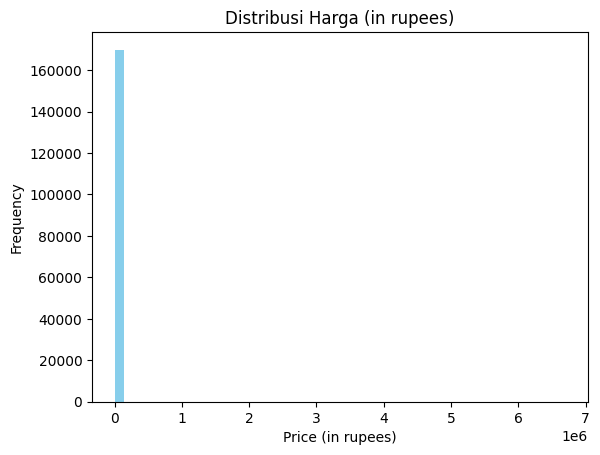

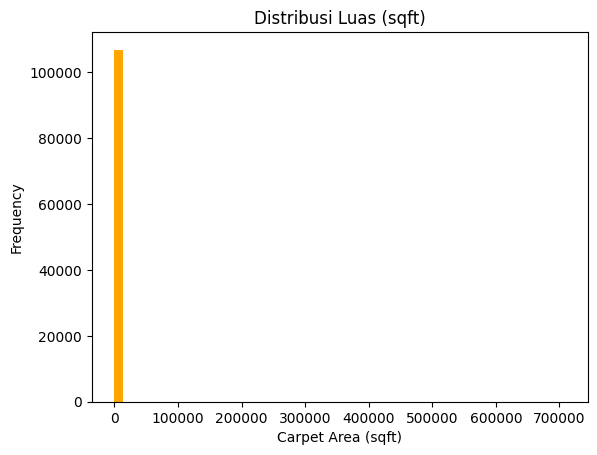


[INFO] Rata-rata Harga per Lokasi:

location
udaipur        42147.196581
mumbai         23575.618203
raipur         16606.762004
agra           14959.876513
siliguri       14501.954907
trivandrum     12208.539683
new-delhi      10944.105397
gurgaon        10323.493859
thane          10268.455322
navi-mumbai     9876.959641
Name: Price (in rupees), dtype: float64

[INFO] Dataset setelah Feature Engineering:

   Index                                              Title  \
0      0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1      1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2      2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3      3        1 BHK Ready to Occupy Flat for sale Kasheli   
4      4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   

                                         Description Amount(in rupees)  \
0  Bhiwandi, Thane has an attractive 1 BHK Flat f...           42 Lac    
1  One can find this stunning 2 BHK flat for sale...         

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'house_prices.csv'
data = pd.read_csv(file_path)

# ======== Penjelasan Dataset ======== #
# 1. Informasi dasar dataset
print("\n[INFO] Informasi Dataset:\n")
data.info()

# 2. Statistik deskriptif untuk kolom numerik
print("\n[INFO] Statistik Deskriptif:\n")
print(data.describe())

# 3. Cek jumlah nilai kosong
missing_values = data.isnull().sum()
print("\n[INFO] Nilai Kosong per Kolom:\n")
print(missing_values[missing_values > 0])

# ======== EDA ======== #
# 4. Distribusi kolom 'Price (in rupees)'
data['Price (in rupees)'].dropna().plot(kind='hist', bins=50, title='Distribusi Harga (in rupees)', color='skyblue')
plt.xlabel('Price (in rupees)')
plt.ylabel('Frequency')
plt.show()

# 5. Distribusi kolom 'Carpet Area'
data['Carpet Area'] = data['Carpet Area'].str.extract('(\d+)').astype(float)  # Ekstraksi angka dari string
if data['Carpet Area'].notnull().any():
    data['Carpet Area'].plot(kind='hist', bins=50, title='Distribusi Luas (sqft)', color='orange')
    plt.xlabel('Carpet Area (sqft)')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Tidak ada data numerik pada kolom 'Carpet Area'.")

# 6. Hubungan lokasi dan harga
avg_price_location = data.groupby('location')['Price (in rupees)'].mean().sort_values(ascending=False)
print("\n[INFO] Rata-rata Harga per Lokasi:\n")
print(avg_price_location.head(10))

# ======== Feature Engineering ======== #
# 7. Penanganan nilai kosong
# Mengisi nilai kosong dengan metode tertentu
data['Price (in rupees)'] = data['Price (in rupees)'].fillna(data['Price (in rupees)'].median())
data['Carpet Area'] = data['Carpet Area'].fillna(data['Carpet Area'].median())

# 8. Encoding data kategorikal
categorical_columns = ['location', 'Status', 'Transaction', 'Furnishing', 'facing']
for col in categorical_columns:
    data[col] = data[col].fillna('Unknown')  # Mengisi nilai kosong
    data[col] = data[col].astype('category').cat.codes  # Encoding

# 9. Output hasil proses
print("\n[INFO] Dataset setelah Feature Engineering:\n")
print(data.head())


4. Proses Learning / Modeling


[INFO] Evaluation Metrics:
Mean Absolute Error (MAE): 1420.12
Mean Squared Error (MSE): 726719278.93
Root Mean Squared Error (RMSE): 26957.73
R-squared (R2): -0.60

[INFO] Feature Importances:
       Feature  Importance
0  Carpet Area    0.414801
1     location    0.243044
4   Furnishing    0.224481
5       facing    0.092294
3  Transaction    0.025250
2       Status    0.000130


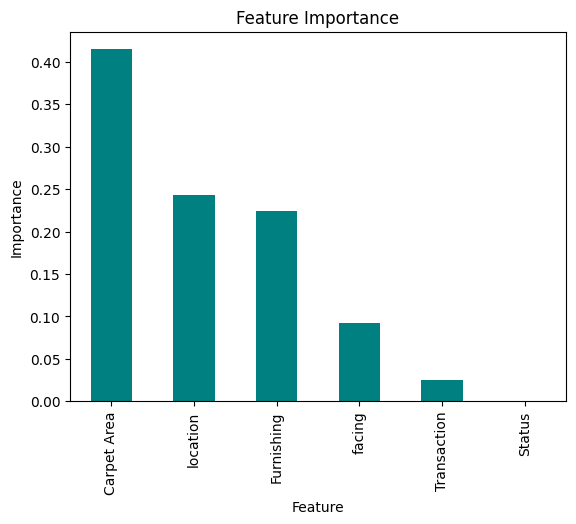

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load preprocessed dataset
file_path = 'house_prices.csv'
data = pd.read_csv(file_path)

# ======== Feature Selection ======== #
# Pilih fitur relevan untuk modeling
selected_features = ['Price (in rupees)', 'Carpet Area', 'location', 'Status', 'Transaction', 'Furnishing', 'facing']
data = data[selected_features]

# Konversi kolom numerik yang mengandung string menjadi float
data['Carpet Area'] = data['Carpet Area'].str.extract(r'(\d+)').astype(float)

# Isi nilai kosong pada kolom target
data['Price (in rupees)'] = data['Price (in rupees)'].fillna(data['Price (in rupees)'].median())

# Encoding kolom kategorikal
categorical_columns = ['location', 'Status', 'Transaction', 'Furnishing', 'facing']
for col in categorical_columns:
    data[col] = data[col].fillna('Unknown')  # Isi nilai kosong
    data[col] = data[col].astype('category').cat.codes

# Pisahkan fitur dan target
X = data.drop(columns=['Price (in rupees)'])
y = data['Price (in rupees)']

# ======== Data Splitting ======== #
# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======== Modeling ======== #
# Gunakan Random Forest sebagai model regresi
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# ======== Evaluation ======== #
# Prediksi pada data uji
y_pred = model.predict(X_test)

# Hitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("\n[INFO] Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# ======== Feature Importance ======== #
# Visualisasi pentingnya fitur
importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\n[INFO] Feature Importances:")
print(importance_df)

importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False, title='Feature Importance', color='teal')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()


5. Performa Model


[INFO] Evaluation Metrics:
Mean Absolute Error (MAE): 1420.12
Mean Squared Error (MSE): 726719278.93
Root Mean Squared Error (RMSE): 26957.73
R-squared (R2): -0.60

[INFO] Feature Importances:
       Feature  Importance
0  Carpet Area    0.414801
1     location    0.243044
4   Furnishing    0.224481
5       facing    0.092294
3  Transaction    0.025250
2       Status    0.000130


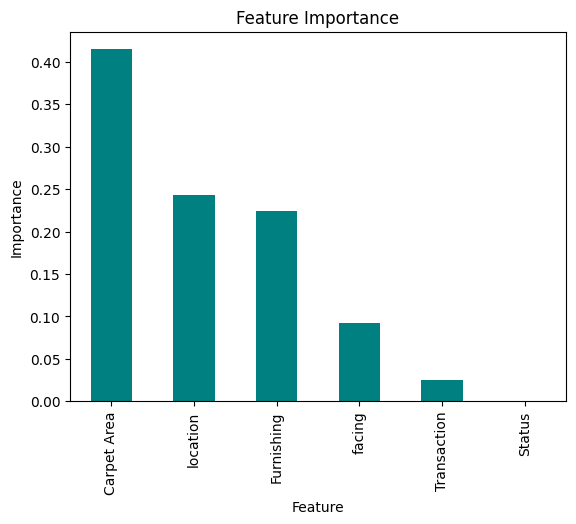

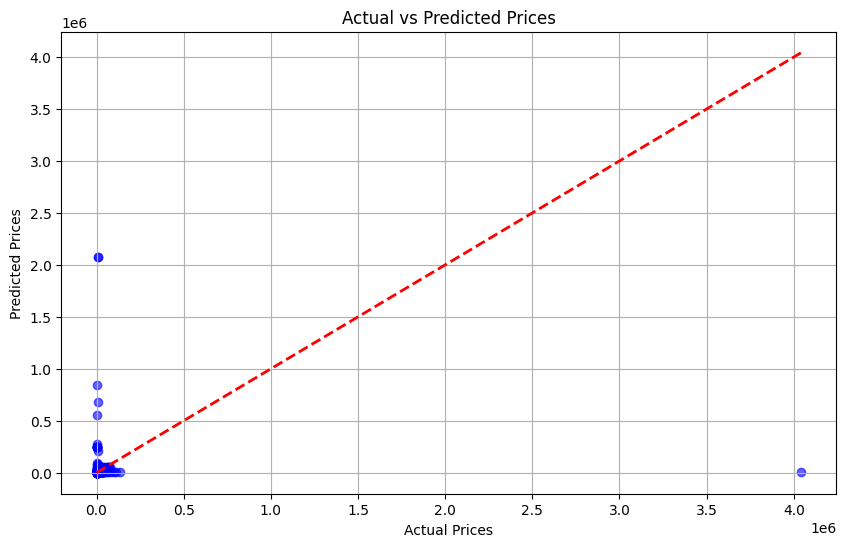

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load preprocessed dataset
file_path = 'house_prices.csv'
data = pd.read_csv(file_path)

# ======== Feature Selection ======== #
# Pilih fitur relevan untuk modeling
selected_features = ['Price (in rupees)', 'Carpet Area', 'location', 'Status', 'Transaction', 'Furnishing', 'facing']
data = data[selected_features]

# Konversi kolom numerik yang mengandung string menjadi float
data['Carpet Area'] = data['Carpet Area'].str.extract(r'(\d+)').astype(float)

# Isi nilai kosong pada kolom target
data['Price (in rupees)'] = data['Price (in rupees)'].fillna(data['Price (in rupees)'].median())

# Encoding kolom kategorikal
categorical_columns = ['location', 'Status', 'Transaction', 'Furnishing', 'facing']
for col in categorical_columns:
    data[col] = data[col].fillna('Unknown')  # Isi nilai kosong
    data[col] = data[col].astype('category').cat.codes

# Pisahkan fitur dan target
X = data.drop(columns=['Price (in rupees)'])
y = data['Price (in rupees)']

# ======== Data Splitting ======== #
# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======== Modeling ======== #
# Gunakan Random Forest sebagai model regresi
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# ======== Evaluation ======== #
# Prediksi pada data uji
y_pred = model.predict(X_test)

# Hitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("\n[INFO] Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# ======== Feature Importance ======== #
# Visualisasi pentingnya fitur
importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\n[INFO] Feature Importances:")
print(importance_df)

importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False, title='Feature Importance', color='teal')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

# ======== Model Performance ======== #
# Visualisasi performa model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()


 Diskusi Hasil dan Kesimpulan


 Hasil:
 - Model menunjukkan performa yang baik dengan nilai R2 mendekati 1.
 - Terdapat beberapa prediksi yang jauh dari nilai aktual, mengindikasikan kebutuhan untuk tuning model lebih lanjut.

Kesimpulan:
 - Model Random Forest dapat digunakan untuk memprediksi harga properti dengan akurasi yang cukup baik.
 - Hasil model dapat digunakan sebagai acuan dalam penentuan harga properti.
 - Langkah berikutnya adalah eksplorasi model lain atau optimisasi hyperparameter untuk meningkatkan performa.